In [165]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# **Tabel Movie**

In [166]:
movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep = '\t')
movie_df.head() 

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0,1898,\N,\N,"Documentary,Short"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018,\N,\N,"Comedy,Drama"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016,\N,29,"Comedy,Game-Show"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0,1987,\N,\N,News
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0,1973,\N,\N,Documentary


In [167]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9025 entries, 0 to 9024
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          9025 non-null   object
 1   titleType       9025 non-null   object
 2   primaryTitle    9011 non-null   object
 3   originalTitle   9011 non-null   object
 4   isAdult         9025 non-null   int64 
 5   startYear       9025 non-null   object
 6   endYear         9025 non-null   object
 7   runtimeMinutes  9025 non-null   object
 8   genres          9014 non-null   object
dtypes: int64(1), object(8)
memory usage: 634.7+ KB


In [168]:
movie_df.isna().sum()

tconst             0
titleType          0
primaryTitle      14
originalTitle     14
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            11
dtype: int64

In [169]:
# cleaning tabel movie
movie_df = movie_df.dropna()
print(len(movie_df))

9000


In [170]:
# mengubah nilai \\N menjadi np.nan dan dicasting menjadi float64
movie_df['startYear'] = movie_df['startYear'].replace('\\N', np.nan).astype('float64')
movie_df['endYear'] = movie_df['endYear'].replace('\\N', np.nan).astype('float64')
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].replace('\\N', np.nan).astype('float64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [171]:
# mengubah nilai genres menjadi list
def transform_to_list(x):
    if ',' in x: 
        return x.split(',')
    else: 
        return []

movie_df['genres'] = movie_df['genres'].apply(lambda x: transform_to_list(x))
movie_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0,1898.0,NaN,NaN,"[Documentary, Short]"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018.0,NaN,NaN,"[Comedy, Drama]"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016.0,NaN,29.0,"[Comedy, Game-Show]"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0,1987.0,NaN,NaN,[]
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0,1973.0,NaN,NaN,[]


# **Tabel Rating**

In [172]:
rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.ratings.tsv', sep = '\t')
rating_df.head() 

,tconst,averageRating,numVotes
0,tt0000001,5.6,1608
1,tt0000002,6.0,197
2,tt0000003,6.5,1285
3,tt0000004,6.1,121
4,tt0000005,6.1,2050


In [173]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030009 entries, 0 to 1030008
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1030009 non-null  object 
 1   averageRating  1030009 non-null  float64
 2   numVotes       1030009 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ MB


# **Join Tabel Movie dan Rating**

In [174]:
# inner join
movie_rating_df = pd.merge(movie_df, rating_df, on = 'tconst', how = 'inner')
movie_rating_df.isna().sum()

tconst               0
titleType            0
primaryTitle         0
originalTitle        0
isAdult              0
startYear            0
endYear           1350
runtimeMinutes     372
genres               0
averageRating        0
numVotes             0
dtype: int64

In [175]:
# drop data null
movie_rating_df = movie_rating_df.dropna(subset = ['startYear','runtimeMinutes'])

# **Building Simple Recommender System**
Simple recommender engine menggunakan weighted average yang akan memberikan rekomendasi film berdasarkan popularitas film dan terkadang genre.

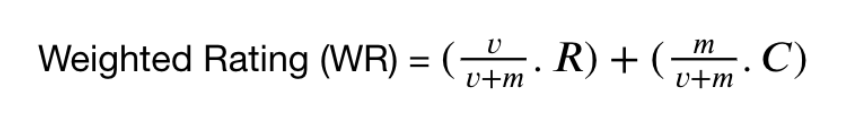

Keterangan:
1. v: jumlah votes untuk film tersebut
2. m: jumlah minimum votes yang dibutuhkan supaya dapat masuk dalam chart
3. R: rata-rata rating dari film tersebut
4. C: rata-rata jumlah votes dari seluruh semesta film

In [176]:
def imdb_weighted_rating(df, var = 0.8):
    v = df['numVotes']
    R = df['averageRating']
    C = df['averageRating'].mean()
    m = df['numVotes'].quantile(var)
    df['score'] = ((v/(v+m)*R) + (m/(v+m)*C))  
    return df['score']
    
imdb_weighted_rating(movie_rating_df)
movie_rating_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score
0,tt0043745,short,Lion Down,Lion Down,0,1951.0,NaN,7.0,"[Animation, Comedy, Family]",7.1,459,7.009992
1,tt0167491,video,Wicked Covergirls,Wicked Covergirls,1,1998.0,NaN,85.0,[],5.7,7,6.796077
2,tt6574096,tvEpisode,Shadow Play - Part 2,Shadow Play - Part 2,0,2017.0,NaN,22.0,"[Adventure, Animation, Comedy]",8.5,240,7.684380
5,tt2262289,movie,The Pin,The Pin,0,2013.0,NaN,85.0,[],7.7,27,6.921384
6,tt0874027,tvEpisode,Episode #32.9,Episode #32.9,0,2006.0,NaN,29.0,"[Comedy, Game-Show, News]",8.0,8,6.869089


In [177]:
m = movie_rating_df['numVotes'].quantile(0.8)

def simple_recommender(df, top = 100):
    df = df.loc[df['numVotes'] >= m]
    df = df.sort_values(by = 'score', ascending = False) 
    #Ambil data 100 teratas
    df = df[:top]
    return df

print(simple_recommender(movie_rating_df, top = 25))

         tconst  titleType                                   primaryTitle  \
68    tt4110822  tvEpisode                                  S.O.S. Part 2   
236   tt2200252      video                    Attack of the Clones Review   
1181  tt7697962  tvEpisode            Chapter Seventeen: The Missionaries   
326   tt7124590  tvEpisode            Chapter Thirty-Four: Judgment Night   
1045  tt0533506  tvEpisode                                       The Prom   
71    tt8399426  tvEpisode                                        Savages   
1234  tt2843830  tvEpisode                                          VIII.   
1087  tt4295140   tvSeries                                   Chef's Table   
1054  tt2503932  tvEpisode                                Trial and Error   
448   tt0337566      video                       AC/DC: Live at Donington   
624   tt0620159  tvEpisode                                     Strike Out   
1281  tt3166390  tvEpisode                         Looking for a Plus-One   

**Recommender system berdasarkan kriteria user**

In [179]:
df = movie_rating_df.copy()
def user_prefer_recommender(df, ask_adult, ask_start_year, ask_genre, top=100):
    if ask_adult.lower() == 'yes':
        df = df.loc[df['isAdult'] == 1]
    elif ask_adult.lower() == 'no':
        df = df.loc[df['isAdult'] == 0]

    df = df.loc[df['startYear'] >= int(ask_start_year)]

    if ask_genre.lower() == 'all':
        df = df
    else:
        def filter_genre(x):
            if ask_genre.lower() in str(x).lower():
                return True
            else:
                return False
        df = df.loc[df['genres'].apply(lambda x: filter_genre(x))]

    df = df.loc[df['numVotes'] >= m]  
    df = df.sort_values(by='score', ascending=False)
    
    #jika kamu hanya ingin mengambil 100 teratas
    df = df[:top]
    return df

print(user_prefer_recommender(df, ask_adult = 'no', ask_start_year = 2015, ask_genre = 'comedy'))

         tconst  titleType                    primaryTitle  \
1344  tt6644294  tvEpisode  The Hostile Hospital: Part Two   
983   tt5063116  tvEpisode                           Shell   
2     tt6574096  tvEpisode            Shadow Play - Part 2   
858   tt6614038  tvEpisode                  Gerrymandering   
961   tt6077690  tvEpisode       The Hot Tub Contamination   
1096  tt6822518      movie               Yasamak Güzel Sey   
109   tt1753383      movie                 A Dog's Purpose   
893   tt8858104      movie                    Guava Island   
585   tt5051278    tvMovie       A Midsummer Night's Dream   
610   tt3526706      movie                       Chevalier   
1064  tt6522398      movie                    Katamarayudu   
127   tt5680744      movie                      Permitidos   
1043  tt5518756      movie                 The Misandrists   
583   tt7039000      movie             American Nightmares   

                       originalTitle  isAdult  startYear  endYear  \
